# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies: 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import pprint 
import scipy.stats as st
from citipy import citipy
from scipy.stats import linregress

#Import API Key: 
from api_keys import weather_api_key
from api_keys import g_key

In [2]:
# #Output File (CSV)
# output_data_file = "output_data/cities.csv"

#Googled Latidutes and Longitues:
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for lat_lngs and cities:
lat_lngs = []
cities = []

# Create a set of random lat and lng combos:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for lat, lng 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Create url
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
# weather_url = url + weather_api_key
# weather_url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = url + weather_api_key
weather_url = f"{url}appid={weather_api_key}&units={units}&q="

print(weather_url)

http://api.openweathermap.org/data/2.5/weather?appid=1468e93b2c670f3c11ae06f1d6ff0c19&units=imperial&q=


In [20]:
#create lists: 
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1
      

print("Beginning Data Retrieval ")
print("-----------------------------")



# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(weather_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : east london
City not found. Skipping...
Processing Record 2 of Set 1 : snezhnogorsk
City not found. Skipping...
Processing Record 3 of Set 1 : khatanga
Processing Record 4 of Set 1 : avarua
Processing Record 5 of Set 1 : shwebo
Processing Record 6 of Set 1 : yeppoon
City not found. Skipping...
Processing Record 7 of Set 1 : jamestown
City not found. Skipping...
Processing Record 8 of Set 1 : riyadh
Processing Record 9 of Set 1 : busselton
Processing Record 10 of Set 1 : yarmouth
Processing Record 11 of Set 1 : bambous virieux
Processing Record 12 of Set 1 : half moon bay
Processing Record 13 of Set 1 : madison
Processing Record 14 of Set 1 : hilo
Processing Record 15 of Set 1 : tilichiki
Processing Record 16 of Set 1 : tasiilaq
Processing Record 17 of Set 1 : new norfolk
Processing Record 18 of Set 1 : esperance
Processing Record 19 of Set 1 : longyearbyen
Processing Record 20 of Set 1 : arraial do c

Processing Record 31 of Set 4 : pekan
Processing Record 32 of Set 4 : thinadhoo
Processing Record 33 of Set 4 : kempele
Processing Record 34 of Set 4 : atuona
Processing Record 35 of Set 4 : thompson
City not found. Skipping...
Processing Record 36 of Set 4 : marzuq
Processing Record 37 of Set 4 : sibu
Processing Record 38 of Set 4 : san patricio
Processing Record 39 of Set 4 : waingapu
Processing Record 40 of Set 4 : leshukonskoye
City not found. Skipping...
Processing Record 41 of Set 4 : patan
Processing Record 42 of Set 4 : nome
Processing Record 43 of Set 4 : alice springs
Processing Record 44 of Set 4 : banyo
Processing Record 45 of Set 4 : aklavik
Processing Record 46 of Set 4 : kirakira
City not found. Skipping...
Processing Record 47 of Set 4 : coquimbo
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 : port augusta
Processing Record 49 of Set 4 : qinggang
Processing Record 50 of Set 4 : tarakan
Processing Record 0 of Set 5 : lavrentiya
Pro

Processing Record 18 of Set 8 : palu
Processing Record 19 of Set 8 : fort nelson
Processing Record 20 of Set 8 : kodinsk
Processing Record 21 of Set 8 : labuhan
Processing Record 22 of Set 8 : burla
Processing Record 23 of Set 8 : babushkin
Processing Record 24 of Set 8 : fairbanks
Processing Record 25 of Set 8 : xiaoshi
Processing Record 26 of Set 8 : waw
Processing Record 27 of Set 8 : nacogdoches
Processing Record 28 of Set 8 : noumea
City not found. Skipping...
Processing Record 29 of Set 8 : hovd
City not found. Skipping...
Processing Record 30 of Set 8 : cidreira
Processing Record 31 of Set 8 : rawson
Processing Record 32 of Set 8 : cukai
Processing Record 33 of Set 8 : santa ana
Processing Record 34 of Set 8 : sao joao da barra
Processing Record 35 of Set 8 : mutis
Processing Record 36 of Set 8 : smithers
Processing Record 37 of Set 8 : svetlogorsk
Processing Record 38 of Set 8 : idenao
Processing Record 39 of Set 8 : ustrzyki dolne
Processing Record 40 of Set 8 : yen bai
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#Create DataFrame
weather_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list            
                
})
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.02,27.91,60.80,77,71,5.82,ZA,1603048285
1,Snezhnogorsk,69.19,33.25,21.20,100,25,2.24,RU,1603048286
2,Khatanga,71.97,102.50,6.89,86,71,8.72,RU,1603048286
3,Avarua,-21.21,-159.78,77.00,73,95,6.93,CK,1603048286
4,Shwebo,22.57,95.70,76.53,84,99,3.00,MM,1603048287


In [27]:
#Save as csv
weather_data.to_csv("output_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [59]:
#There are no cities w/ Humidity > 100%
humidity = weather_data.loc[weather_data["Humidity"] > 100]
humidity.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

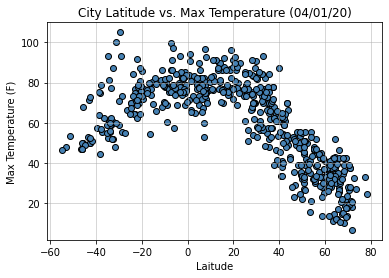

In [90]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

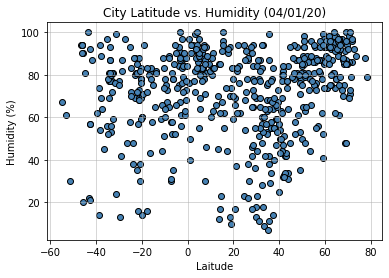

In [61]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

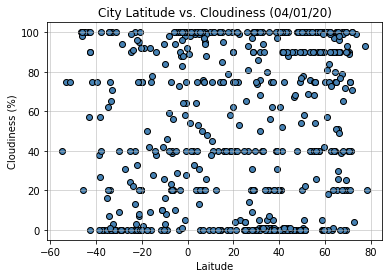

In [53]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")
# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Max Cloudiness.png")

## Latitude vs. Wind Speed Plot

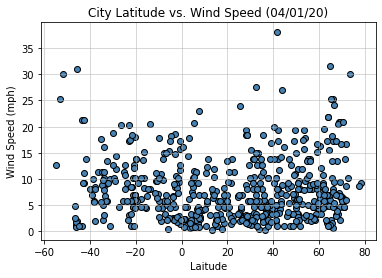

In [63]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#Set title
plt.title("City Latitude vs. Wind Speed (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set y axis limitplt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Wind Speed.png")

## Linear Regression

In [125]:
#Create DataFrame for Northern and Southern Hemisphere: 
northern_hemisphere = weather_data.loc[weather_data["Lat"].astype(float) >= 0,:]
southern_hemisphere = weather_data.loc[weather_data["Lat"].astype (float) < 0, :]
# northern_hemisphere.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7402544678871079


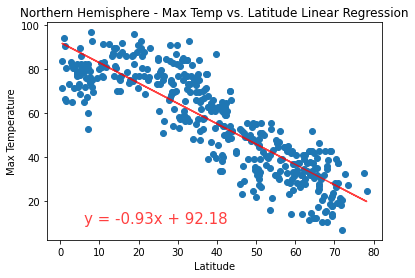

<Figure size 432x288 with 0 Axes>

In [209]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4030707020892891


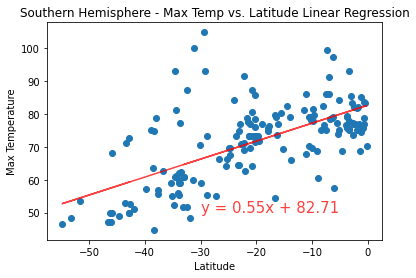

<Figure size 432x288 with 0 Axes>

In [227]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(-30,50),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.039262908396249


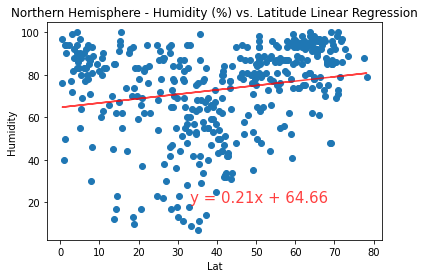

<Figure size 432x288 with 0 Axes>

In [226]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(33,20),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010251348038029823


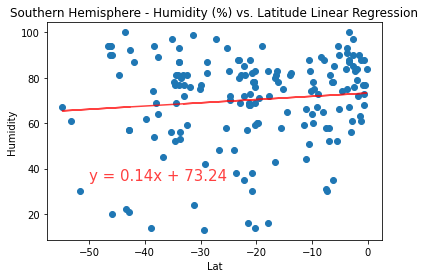

<Figure size 432x288 with 0 Axes>

In [230]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(-50,35),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00446899576463486


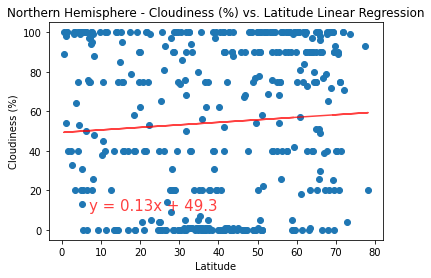

<Figure size 432x288 with 0 Axes>

In [231]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",alpha=0.75)
plt.annotate(line_eq,(7,10),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0013348208570604146


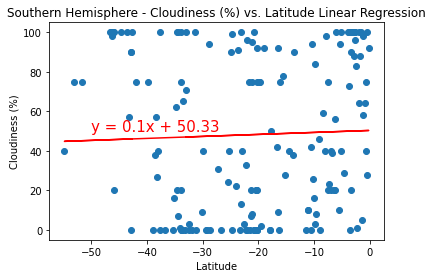

<Figure size 432x288 with 0 Axes>

In [250]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.216727299140751


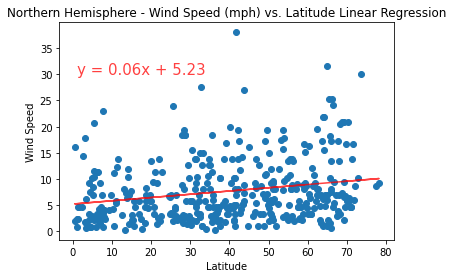

<Figure size 432x288 with 0 Axes>

In [240]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(1,30),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Output/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02161036357737758


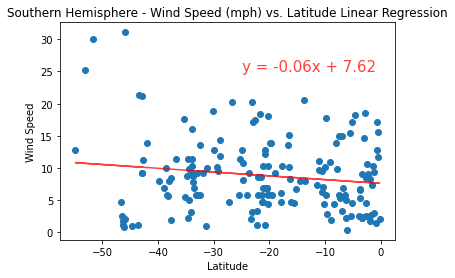

<Figure size 432x288 with 0 Axes>

In [249]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(-25,25),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")